In [1]:
import pvlib
import pandas as pd

latitude, longitude, tz, altitude, name = 45, -90, 'US/East-Indiana', 1500, 'Michigan'
times = pd.date_range(start='2020-07-01', end='2020-07-02', freq='1Min', tz=tz)
solpos = pvlib.solarposition.get_solarposition(times, latitude, longitude)

apparent_elevation = solpos['apparent_elevation']
aod700 = 0.1
precipitable_water = 1
pressure = pvlib.atmosphere.alt2pres(altitude)
dni_extra = pvlib.irradiance.get_extra_radiation(times)

irrad_data = pvlib.clearsky.simplified_solis(apparent_elevation, aod700, precipitable_water, pressure, dni_extra)

surf_tilt = 40
surf_az = 0

# pvlib.irradiance.klucher(surface_tilt=surf_tilt, surface_azimuth=surf_az,
#                          dhi=irrad_data['dhi'], ghi=irrad_data['ghi'],
#                         elevation=apparent_elevation)

# pvlib.irradiance.get_total_irradiance(
#     surface_tilt = 0,
#     surface_azimuth=0,
#     solar_zenith=0,
#     solar_azimuth=0
# )

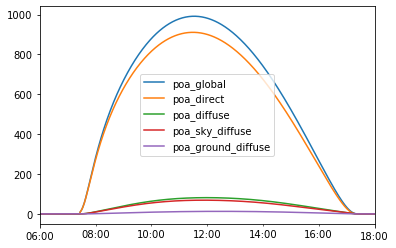

In [71]:

tus = pvlib.location.Location(32.2, -111, 'US/Arizona', 700, 'Tucson')
times = pd.date_range(start='2016-01-01T06:00:00', end='2016-01-01T18:00:00', freq='1min', tz=tus.tz)
ephem_data = tus.get_solarposition(times)
irrad_data = tus.get_clearsky(times)
dni_et = pvlib.irradiance.get_extra_radiation(times.dayofyear)
sun_zen = ephem_data['apparent_zenith']
sun_az = ephem_data['azimuth']
AM = pvlib.atmosphere.get_relative_airmass(sun_zen)


surf_tilt = 40
surf_az = 150

irradiance = pvlib.irradiance.get_total_irradiance(surf_tilt, surf_az,
                                      sun_zen, sun_az,
                                     dni = irrad_data['dni'], ghi=irrad_data['ghi'], dhi=irrad_data['dhi'],
                                     dni_extra=dni_et, airmass=AM,
                                     model='klucher',
                                     surface_type = 'urban')

irradiance.plot()

/usr/local/lib/python3.8/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in arccos
  result = getattr(ufunc, method)(*inputs, **kwargs)


514155.41913811147

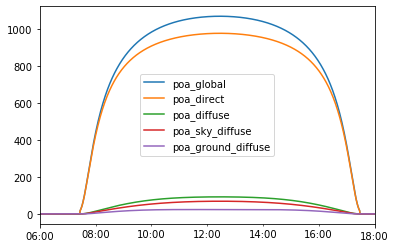

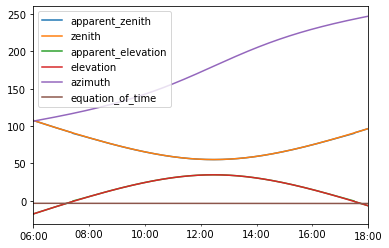

In [83]:
surf_tilt = ephem_data['zenith']
surf_az = ephem_data['azimuth']

rad = pvlib.irradiance.get_total_irradiance(surf_tilt, surf_az,
                                      sun_zen, sun_az,
                                     dni = irrad_data['dni'], ghi=irrad_data['ghi'], dhi=irrad_data['dhi'],
                                     dni_extra=dni_et, airmass=AM,
                                     model='klucher',
                                     surface_type = 'urban')

rad.plot()
ephem_data.plot()

rad['poa_global'].sum()

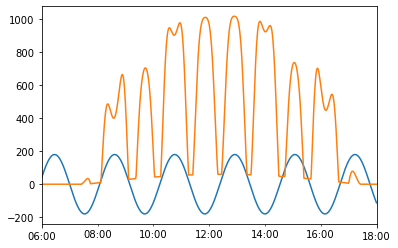

In [102]:
def foo(t):
    from math import cos
    timeofday = t.second + t.minute * 60 + t.hour * 3600
    return cos(timeofday / 1234)

angles = 180 * pd.Series([foo(t) for t in times], index=times)
angles.plot()


surf_tilt = 40
surf_az = angles

rad = pvlib.irradiance.get_total_irradiance(surf_tilt, surf_az,
                                      sun_zen, sun_az,
                                     dni = irrad_data['dni'], ghi=irrad_data['ghi'], dhi=irrad_data['dhi'],
                                     dni_extra=dni_et, airmass=AM,
                                     model='klucher',
                                     surface_type = 'urban')

rad['poa_global'].plot()

Cl = 1.060, Cd = 0.007 + 0.021 + 0.013 = 0.041
Level flight at 33.50 W
Have 1.46 sqm of solar
MSoc = 47.73%


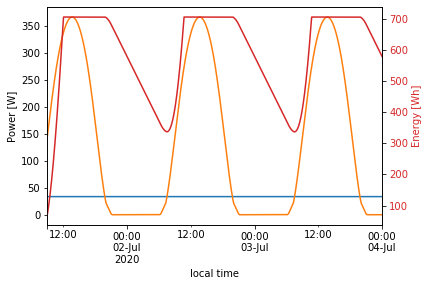

,P_solar,P_flight,bat_Wh
2020-07-01 09:00:00-04:00,144.464018,33.502553,70.500000
2020-07-01 09:01:00-04:00,145.832281,33.502553,72.278554
2020-07-01 09:02:00-04:00,147.200450,33.502553,74.078771
2020-07-01 09:03:00-04:00,148.568443,33.502553,75.900647
2020-07-01 09:04:00-04:00,149.936180,33.502553,77.744180
...,...,...,...
2020-07-03 23:56:00-04:00,0.000000,33.502553,580.421188
2020-07-03 23:57:00-04:00,0.000000,33.502553,579.846061
2020-07-03 23:58:00-04:00,0.000000,33.502553,579.270934
2020-07-03 23:59:00-04:00,0.000000,33.502553,578.695806


In [56]:
# This cell contains what we care about
# We will need to feed in the system parameters
# As well as, most likely, a plot of our azimuth/tilt values from the flight
# Probably we want to put solar parameters on the Aircraft, and then have the Flight do the fun combining stuff
# Trajectory can spit out the azimuth/tilt values
# Do we want to model more than one tilt value??? (probably not for now)

import matplotlib.pyplot as plt
import pandas as pd
import pvlib

# "Oettershagen" here refers to Oettershagen2017Design
# papers/aircraft design/Aircraft design - Oettershagen2017Design.pdf

# Arbitrarily chosen
latitude, longitude, tz, altitude, name = 43, -84, 'US/East-Indiana', 2500, 'Michigan'
times = pd.date_range(start='2020-07-01T09', end='2020-07-04', freq='1Min', tz=tz)
loc = pvlib.location.Location(latitude, longitude, tz, altitude, name)
ephem_data = loc.get_solarposition(times)
irrad_data = loc.get_clearsky(times)
dni_et = pvlib.irradiance.get_extra_radiation(times.dayofyear)
sun_zen = ephem_data['apparent_zenith']
sun_az = ephem_data['azimuth']
AM = pvlib.atmosphere.get_relative_airmass(sun_zen)

surf_tilt = 30
surf_az = 180

rad = pvlib.irradiance.get_total_irradiance(surf_tilt, surf_az,
                                      sun_zen, sun_az,
                                     dni = irrad_data['dni'], ghi=irrad_data['ghi'], dhi=irrad_data['dhi'],
                                     dni_extra=dni_et, airmass=AM,
                                     model='klucher')

# These values from Oettershagen table 1
eff_solr = 0.237
eff_mppt = 0.95
eff_cmbr = 0.97
eff_prop = 0.62
eff_btch = 0.95
eff_btdc = 1.03 # How does that work?



wing_span = 5.65
wing_chrd = 0.305
wing_area = wing_span * wing_chrd
wing_aspt = wing_span / wing_chrd
solr_fill = 0.85
solr_area = solr_fill * wing_area

# For Oettershagen Eq 7
mass = 7.0
# From their MH139F in XFOIL at Re=184k and alpha=5.5
Cl = 1.0603
Cdwing = 0.01337
e0 = 0.92
# Eq 8
Cdpar = 0.075*(184000)^-0.2
# Eq 9
Cdind = Cl^2 / (pi * e0 * wing_aspt)
# "wing profile...drag coefficient...and the airplane fuselage and stabilizer parasitic drag and induced drag added"
Cd = Cdpar + Cdind + Cdwing
print('Cl = %.3f, Cd = %.3f + %.3f + %.3f = %.3f' % (Cl, Cdpar, Cdind, Cdwing, Cd))
g = 9.8
airDensity = 1.225
P_level = (Cd / Cl^1.5) * sqrt((2 * (mass * g)^3) / (airDensity * wing_area))
P_level /= eff_prop
print('Level flight at %.2f W' % P_level)

P_flight = pd.Series([P_level for i in times], index=times).astype(float)

print('Have %.2f sqm of solar' % solr_area)


P_solar = rad['poa_global'] * solr_area * eff_solr * eff_mppt * eff_cmbr




time_span = 60

Wh_cap = 705
J_cap = Wh_cap * 3600

bat_start_fill = 0.1
bat_start = bat_start_fill * J_cap

bat = [0 for time in times]
bat[0] = bat_start
for idx in range(1, len(bat)):
    t = times[idx]
    P_out = P_flight[t]
    P_in = P_solar[t]
    P_bat = P_in - P_out
    if P_bat > 0:
        # Charging
        P_bat *= eff_btch
    else:
        # discharging
        P_bat *= eff_btdc
    bat[idx] = bat[idx - 1] + time_span * P_bat
    if bat[idx] > J_cap: bat[idx] = J_cap
    
bat_series = pd.Series(bat, index=times).astype(float)
bat_Wh = bat_series / 3600


msoc = bat_Wh['20200701T1200':].min() / Wh_cap
print('MSoc = %.2f%%' % (msoc*100))

fix, ax1 = plt.subplots()
ax1.set_xlabel('local time')
ax1.set_ylabel('Power [W]')

P_flight.plot(color='tab:blue')
P_solar.plot(color='tab:orange')

ax2 = ax1.twinx()
ax2.set_ylabel('Energy [Wh]', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')
bat_Wh.plot(color='tab:red')


plt.show()

pd.concat({
    'P_solar': P_solar,
    'P_flight': P_flight,
    'bat_Wh': bat_Wh
}, axis=1)

TypeError: cannot coerce arguments: no canonical coercion from <class 'pandas.core.series.Series'> to Symbolic Ring

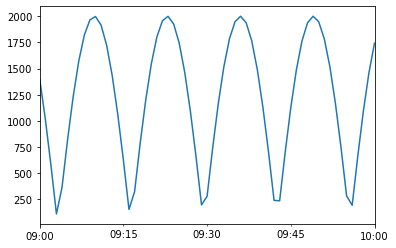

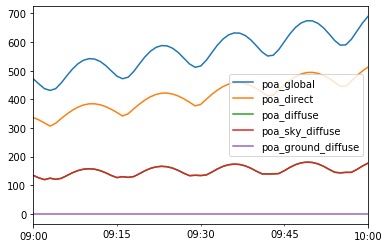

In [55]:
# Arbitrarily chosen
def foo(t):
    from math import cos
    timeofday = t.second + t.minute * 60 + t.hour * 3600
    return abs(cos(timeofday / 1000*4))

times = pd.date_range(start='2020-07-01T09', end='2020-07-01T10', freq='1Min', tz=tz)
latitude, longitude, tz, name = 43, -84, 'US/East-Indiana', 'Michigan'

altitude = pd.Series([2000*foo(t) for t in times], index=times, dtype=float)
altitude.plot()

loc = pvlib.location.Location(latitude, longitude, tz, altitude, name)
ephem_data = loc.get_solarposition(times)
irrad_data = loc.get_clearsky(times)
dni_et = pvlib.irradiance.get_extra_radiation(times.dayofyear)
sun_zen = ephem_data['apparent_zenith']
sun_az = ephem_data['azimuth']
AM = pvlib.atmosphere.get_relative_airmass(sun_zen)

surf_tilt = 0
surf_az = 180

rad = pvlib.irradiance.get_total_irradiance(surf_tilt, surf_az,
                                      sun_zen, sun_az,
                                     dni = irrad_data['dni'], ghi=irrad_data['ghi'], dhi=irrad_data['dhi'],
                                     dni_extra=dni_et, airmass=AM,
                                     model='klucher')

rad.plot()
log(altitude)